In [1]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.utils.data import Dataset
import numpy as np
import pandas as pd

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

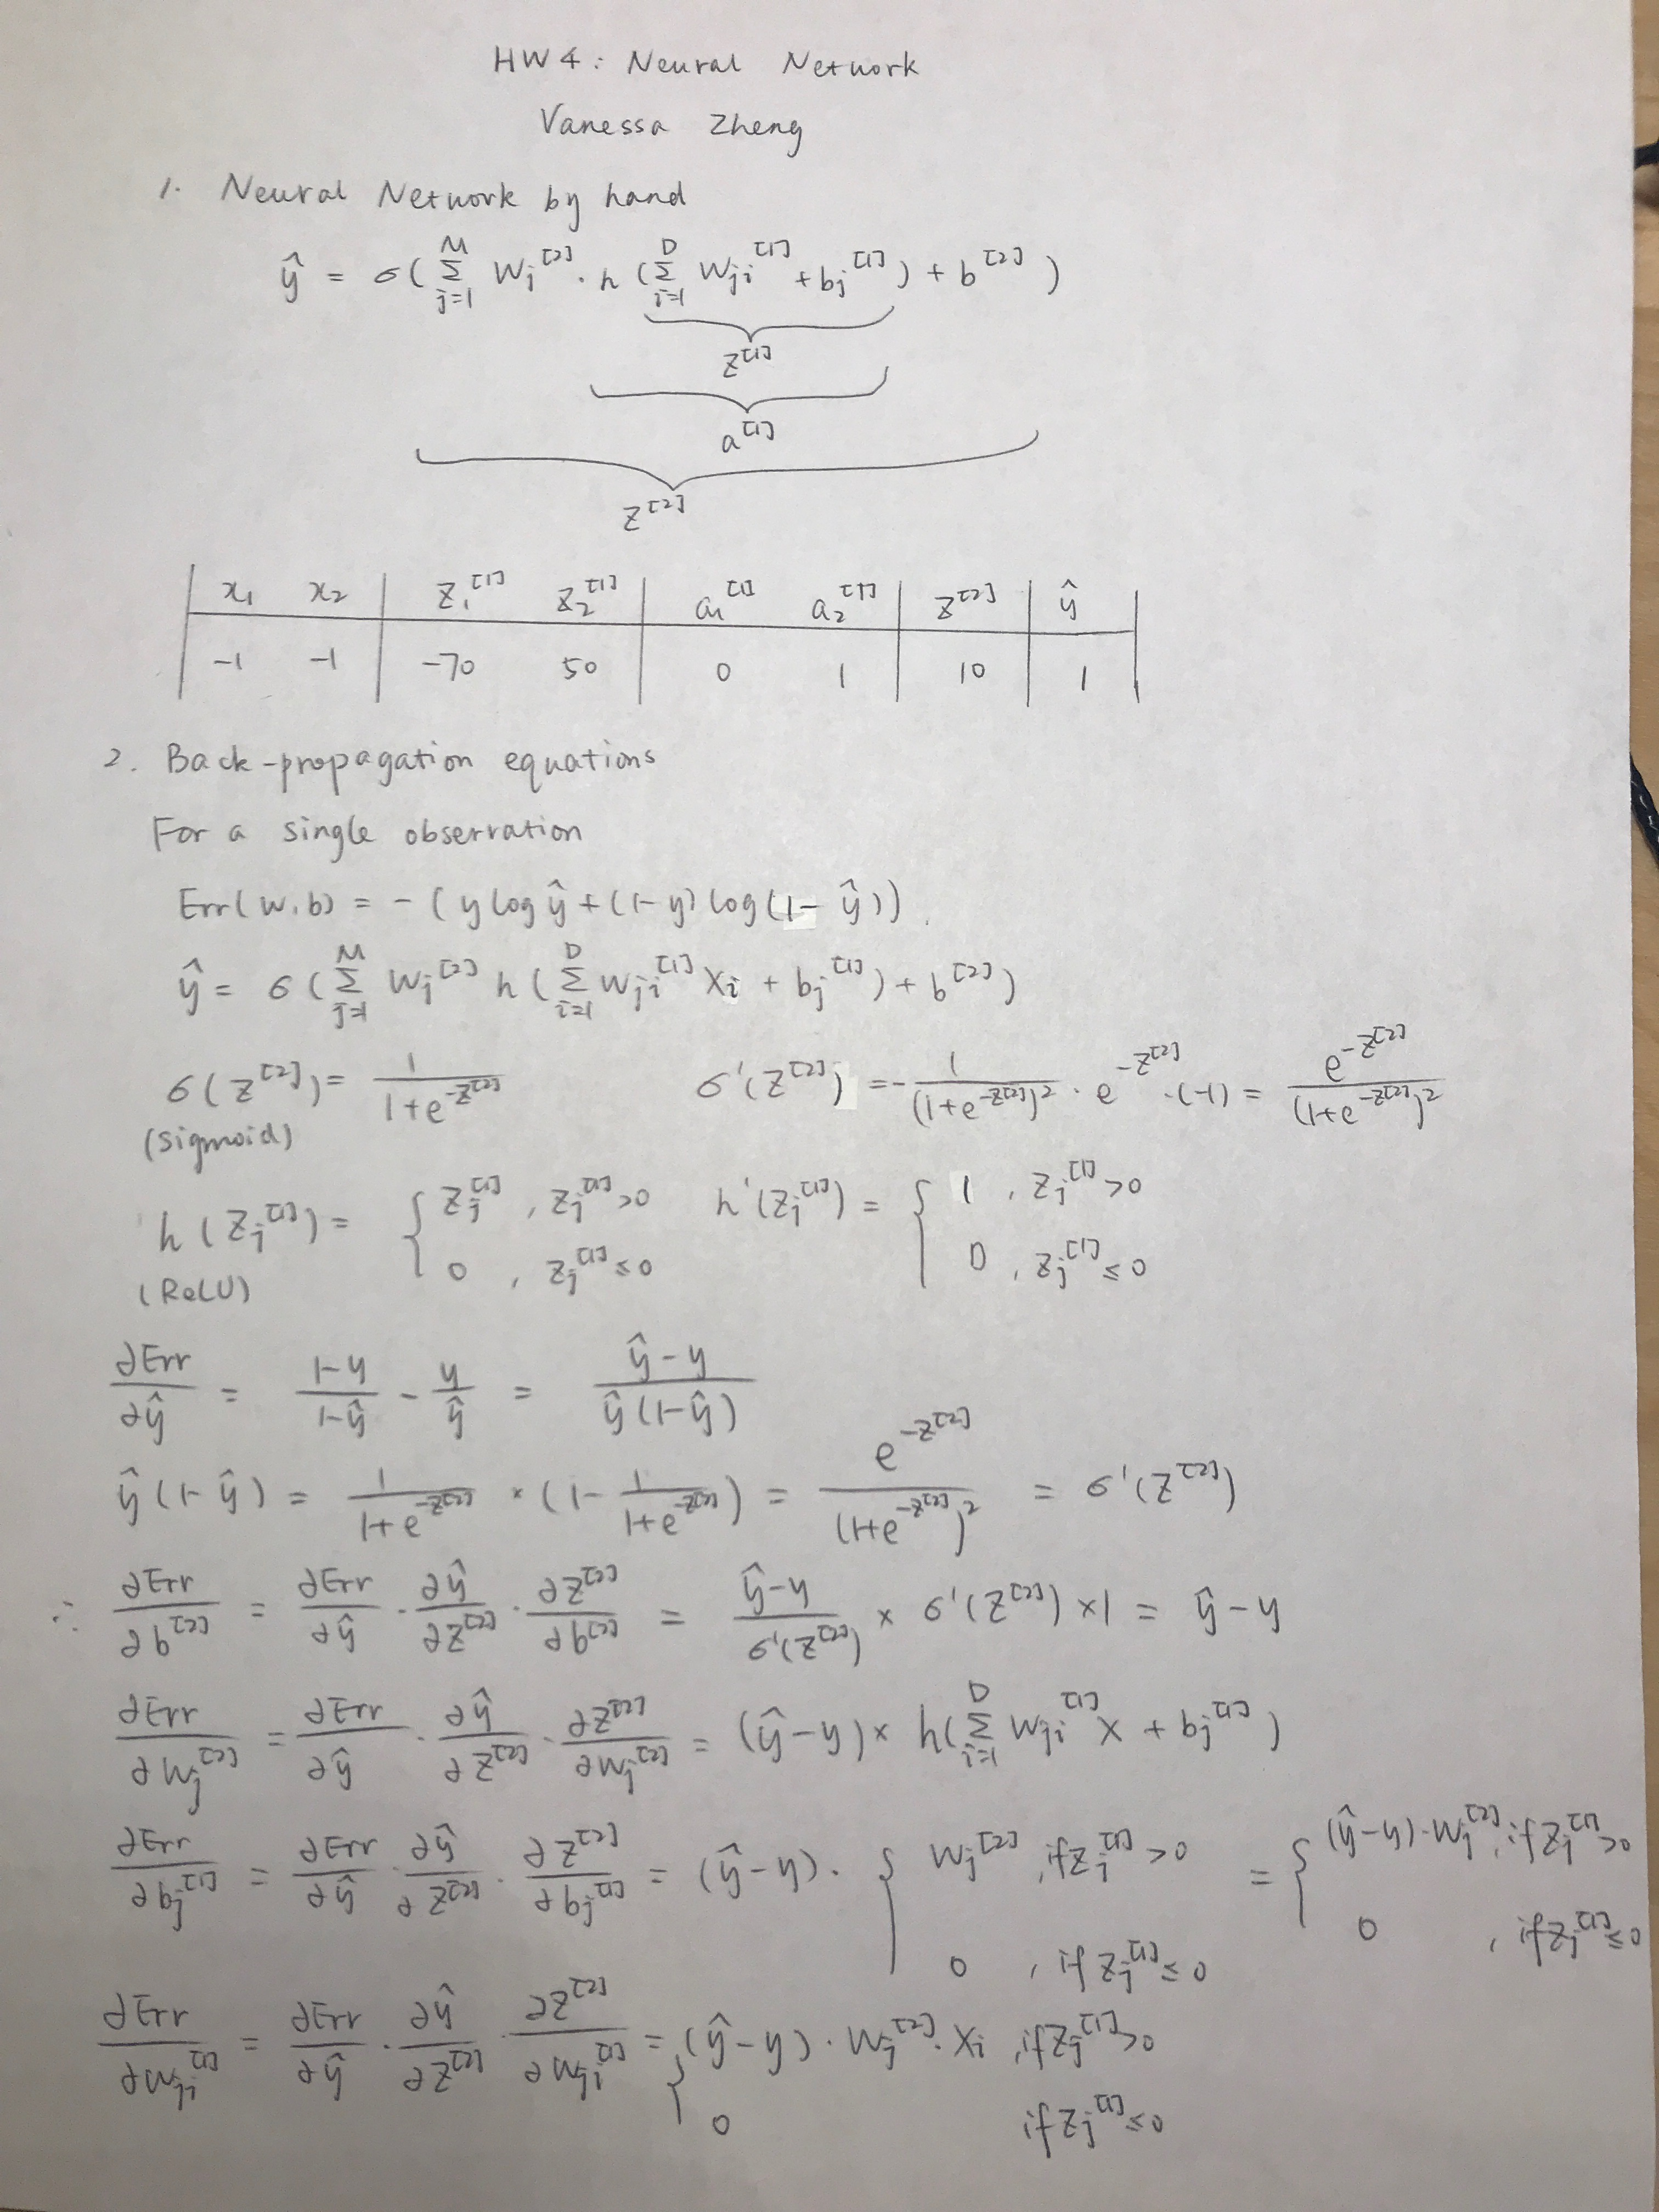

In [10]:
from IPython.display import Image
Image(filename='hw4q1.jpg')

In [2]:
train_ds = datasets.MNIST('./data', train=True, download=True, 
                       transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_ds = datasets.MNIST('./data', train=False, download=True, 
                       transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

In [3]:
batch_size = 64
#batch_size = 5 # for testing
kwargs = {'num_workers': 1, 'pin_memory': True} 

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, **kwargs)

## Feed Forward Neural Network

In [59]:
def get_model(M = 300):
    net = nn.Sequential(nn.Linear(28*28, M),
                        nn.ReLU(),
                        nn.Linear(M, 10))
    return net.cuda() 

In [5]:
def train_model(train_loader, test_loader, num_epochs, model, optimizer):
    for epoch in range(num_epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for i, (images, labels) in enumerate(train_loader):  
            batch = images.shape[0] # size of the batch
            # Convert torch tensor to Variable, change shape of the input
            images = Variable(images.view(-1, 28*28)).cuda()
            labels = Variable(labels).cuda()
        
            # Forward + Backward + Optimize
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
        
            total += batch
            sum_loss += batch * loss.data[0]
            if (i+1) % 100 == 0:
                print ('Epoch [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, sum_loss/total))
                
        train_loss = sum_loss/total
        print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, train_loss))
        val_acc, val_loss = model_accuracy_loss(model, test_loader)
        print('Epoch [%d/%d], Valid Accuracy: %.4f, Valid Loss: %.4f' %(epoch+1, num_epochs, val_acc, val_loss))
    return val_acc, val_loss, train_loss

In [6]:
def model_accuracy_loss(model, test_loader):
    model.eval()
    correct = 0
    sum_loss = 0.0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28)).cuda()
        labels = Variable(labels).cuda()
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        loss = F.cross_entropy(outputs, labels)
        sum_loss += labels.size(0)*loss.data[0]
        total += labels.size(0)
        correct += pred.eq(labels.data).cpu().sum()
    return 100 * correct / total, sum_loss/ total

## Tuning learning rate

In [7]:
learning_rate = [1., 0.1, 0.01, 0.001, 0.0001, 0.00001]
lst_val_acc = []
lst_val_loss = []
lst_train_loss = []
for l_r in learning_rate:
    net = get_model()
    optimizer = optim.Adam(net.parameters(), lr=l_r)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, num_epochs=10, model=net, optimizer=optimizer)
    lst_val_acc.append(val_acc)
    lst_val_loss.append(val_loss)
    lst_train_loss.append(train_loss)           
    

Epoch [1/10], Loss: 1172.2778
Epoch [1/10], Loss: 588.9818
Epoch [1/10], Loss: 394.1114
Epoch [1/10], Loss: 297.4443
Epoch [1/10], Loss: 240.3124
Epoch [1/10], Loss: 200.8506
Epoch [1/10], Loss: 172.7901
Epoch [1/10], Loss: 151.7264
Epoch [1/10], Loss: 135.5990
Epoch [1/10], Loss: 130.2964
Epoch [1/10], Valid Accuracy: 10.6400, Valid Loss: 2.3993
Epoch [2/10], Loss: 2.3449
Epoch [2/10], Loss: 2.5594
Epoch [2/10], Loss: 2.4900
Epoch [2/10], Loss: 2.6642
Epoch [2/10], Loss: 3.0661
Epoch [2/10], Loss: 4.7069
Epoch [2/10], Loss: 4.3755
Epoch [2/10], Loss: 4.1224
Epoch [2/10], Loss: 3.9256
Epoch [2/10], Loss: 3.9242
Epoch [2/10], Valid Accuracy: 10.5100, Valid Loss: 2.6064
Epoch [3/10], Loss: 2.8913
Epoch [3/10], Loss: 2.5845
Epoch [3/10], Loss: 2.5628
Epoch [3/10], Loss: 2.5244
Epoch [3/10], Loss: 2.4963
Epoch [3/10], Loss: 2.4762
Epoch [3/10], Loss: 2.4601
Epoch [3/10], Loss: 2.4481
Epoch [3/10], Loss: 2.4387
Epoch [3/10], Loss: 2.4362
Epoch [3/10], Valid Accuracy: 10.1600, Valid Loss: 2.

Epoch [6/10], Loss: 0.1551
Epoch [6/10], Loss: 0.1533
Epoch [6/10], Loss: 0.1627
Epoch [6/10], Loss: 0.1598
Epoch [6/10], Loss: 0.1642
Epoch [6/10], Loss: 0.1661
Epoch [6/10], Loss: 0.1679
Epoch [6/10], Loss: 0.1681
Epoch [6/10], Loss: 0.1675
Epoch [6/10], Loss: 0.1689
Epoch [6/10], Valid Accuracy: 95.1000, Valid Loss: 0.2060
Epoch [7/10], Loss: 0.1666
Epoch [7/10], Loss: 0.1536
Epoch [7/10], Loss: 0.1574
Epoch [7/10], Loss: 0.1615
Epoch [7/10], Loss: 0.1604
Epoch [7/10], Loss: 0.1662
Epoch [7/10], Loss: 0.1712
Epoch [7/10], Loss: 0.1709
Epoch [7/10], Loss: 0.1726
Epoch [7/10], Loss: 0.1730
Epoch [7/10], Valid Accuracy: 95.3500, Valid Loss: 0.2338
Epoch [8/10], Loss: 0.1468
Epoch [8/10], Loss: 0.1395
Epoch [8/10], Loss: 0.1440
Epoch [8/10], Loss: 0.1540
Epoch [8/10], Loss: 0.1557
Epoch [8/10], Loss: 0.1589
Epoch [8/10], Loss: 0.1565
Epoch [8/10], Loss: 0.1579
Epoch [8/10], Loss: 0.1583
Epoch [8/10], Loss: 0.1593
Epoch [8/10], Valid Accuracy: 94.9800, Valid Loss: 0.2854
Epoch [9/10], Lo

Epoch [1/10], Loss: 2.1694
Epoch [1/10], Loss: 2.0579
Epoch [1/10], Loss: 1.9499
Epoch [1/10], Loss: 1.8397
Epoch [1/10], Loss: 1.7378
Epoch [1/10], Loss: 1.6444
Epoch [1/10], Loss: 1.5597
Epoch [1/10], Loss: 1.4874
Epoch [1/10], Loss: 1.4202
Epoch [1/10], Loss: 1.3966
Epoch [1/10], Valid Accuracy: 84.4400, Valid Loss: 0.7997
Epoch [2/10], Loss: 0.7852
Epoch [2/10], Loss: 0.7646
Epoch [2/10], Loss: 0.7414
Epoch [2/10], Loss: 0.7197
Epoch [2/10], Loss: 0.6997
Epoch [2/10], Loss: 0.6847
Epoch [2/10], Loss: 0.6694
Epoch [2/10], Loss: 0.6544
Epoch [2/10], Loss: 0.6417
Epoch [2/10], Loss: 0.6373
Epoch [2/10], Valid Accuracy: 88.5300, Valid Loss: 0.5006
Epoch [3/10], Loss: 0.5115
Epoch [3/10], Loss: 0.5016
Epoch [3/10], Loss: 0.4976
Epoch [3/10], Loss: 0.4925
Epoch [3/10], Loss: 0.4858
Epoch [3/10], Loss: 0.4792
Epoch [3/10], Loss: 0.4733
Epoch [3/10], Loss: 0.4681
Epoch [3/10], Loss: 0.4637
Epoch [3/10], Loss: 0.4623
Epoch [3/10], Valid Accuracy: 89.9000, Valid Loss: 0.4032
Epoch [4/10], Lo

In [8]:
df = pd.DataFrame(
    {
        'Learning Rate': learning_rate,
        'Validation Accuracy': lst_val_acc,
        'Validation Loss': lst_val_loss,
        'Training Loss': lst_train_loss
    },
    columns = ['Learning Rate', 'Validation Accuracy','Validation Loss', 'Training Loss']
)
df

,Learning Rate,Validation Accuracy,Validation Loss,Training Loss
0,1.00000,10.39,2.474983,2.373883
1,0.10000,9.85,2.305760,2.267042
2,0.01000,95.35,0.287612,0.154881
3,0.00100,98.05,0.080931,0.015496
4,0.00010,97.62,0.079462,0.062864
5,0.00001,92.73,0.255433,0.267469


### Fining tuning with Interpolation between 0.0001 and 0.001

In [9]:
interpolate_lr = [0.0002, 0.0004, 0.0006, 0.0008]
lst_val_acc1 = []
lst_val_loss1 = []
lst_train_loss1 = []
for l_r in interpolate_lr:
    net = get_model()
    optimizer = optim.Adam(net.parameters(), lr=l_r)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, num_epochs=10, model=net, optimizer=optimizer)
    lst_val_acc1.append(val_acc)
    lst_val_loss1.append(val_loss)
    lst_train_loss1.append(train_loss) 

Epoch [1/10], Loss: 1.0179
Epoch [1/10], Loss: 0.7316
Epoch [1/10], Loss: 0.6070
Epoch [1/10], Loss: 0.5340
Epoch [1/10], Loss: 0.4872
Epoch [1/10], Loss: 0.4488
Epoch [1/10], Loss: 0.4208
Epoch [1/10], Loss: 0.3975
Epoch [1/10], Loss: 0.3796
Epoch [1/10], Loss: 0.3734
Epoch [1/10], Valid Accuracy: 94.1500, Valid Loss: 0.2042
Epoch [2/10], Loss: 0.1958
Epoch [2/10], Loss: 0.2040
Epoch [2/10], Loss: 0.1988
Epoch [2/10], Loss: 0.1931
Epoch [2/10], Loss: 0.1895
Epoch [2/10], Loss: 0.1841
Epoch [2/10], Loss: 0.1818
Epoch [2/10], Loss: 0.1796
Epoch [2/10], Loss: 0.1770
Epoch [2/10], Loss: 0.1761
Epoch [2/10], Valid Accuracy: 95.8600, Valid Loss: 0.1421
Epoch [3/10], Loss: 0.1341
Epoch [3/10], Loss: 0.1325
Epoch [3/10], Loss: 0.1303
Epoch [3/10], Loss: 0.1305
Epoch [3/10], Loss: 0.1298
Epoch [3/10], Loss: 0.1281
Epoch [3/10], Loss: 0.1269
Epoch [3/10], Loss: 0.1246
Epoch [3/10], Loss: 0.1239
Epoch [3/10], Loss: 0.1237
Epoch [3/10], Valid Accuracy: 96.7600, Valid Loss: 0.1113
Epoch [4/10], Lo

Epoch [6/10], Loss: 0.0238
Epoch [6/10], Loss: 0.0237
Epoch [6/10], Loss: 0.0248
Epoch [6/10], Loss: 0.0248
Epoch [6/10], Loss: 0.0267
Epoch [6/10], Loss: 0.0274
Epoch [6/10], Loss: 0.0276
Epoch [6/10], Loss: 0.0285
Epoch [6/10], Loss: 0.0292
Epoch [6/10], Loss: 0.0292
Epoch [6/10], Valid Accuracy: 97.9700, Valid Loss: 0.0648
Epoch [7/10], Loss: 0.0201
Epoch [7/10], Loss: 0.0201
Epoch [7/10], Loss: 0.0206
Epoch [7/10], Loss: 0.0204
Epoch [7/10], Loss: 0.0210
Epoch [7/10], Loss: 0.0213
Epoch [7/10], Loss: 0.0215
Epoch [7/10], Loss: 0.0216
Epoch [7/10], Loss: 0.0221
Epoch [7/10], Loss: 0.0224
Epoch [7/10], Valid Accuracy: 98.0200, Valid Loss: 0.0706
Epoch [8/10], Loss: 0.0144
Epoch [8/10], Loss: 0.0153
Epoch [8/10], Loss: 0.0165
Epoch [8/10], Loss: 0.0170
Epoch [8/10], Loss: 0.0180
Epoch [8/10], Loss: 0.0179
Epoch [8/10], Loss: 0.0181
Epoch [8/10], Loss: 0.0185
Epoch [8/10], Loss: 0.0188
Epoch [8/10], Loss: 0.0188
Epoch [8/10], Valid Accuracy: 98.0000, Valid Loss: 0.0664
Epoch [9/10], Lo

In [11]:
df1 = pd.DataFrame(
    {
        'Learning Rate': interpolate_lr,
        'Validation Accuracy': lst_val_acc1,
        'Validation Loss': lst_val_loss1,
        'Training Loss': lst_train_loss1
    },
    columns = ['Learning Rate', 'Validation Accuracy','Validation Loss', 'Training Loss']
)
df1

,Learning Rate,Validation Accuracy,Validation Loss,Training Loss
0,0.0002,97.99,0.062995,0.029697
1,0.0004,97.46,0.082466,0.013917
2,0.0006,97.85,0.079644,0.012495
3,0.0008,98.06,0.076439,0.012294


Text(0,0.5,'Loss')

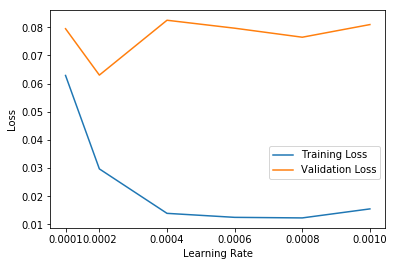

In [51]:
df_lr = pd.concat([df.iloc[3:5,:],df1]).sort_values(by = 'Learning Rate')
plt.plot(df_lr['Learning Rate'], df_lr['Training Loss'])
plt.plot(df_lr['Learning Rate'], df_lr['Validation Loss'])
plt.xticks(df_lr['Learning Rate'])
plt.legend(['Training Loss', 'Validation Loss'], loc='center right', bbox_to_anchor=(1.0, 0.3), ncol=1)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

When learning rate = 0.0008, the neural network has best validation accuracy 98.06%.

## Tuning size of a hidden layer

In [12]:
hidden_layer_size = [10, 50, 100, 300, 1000, 2000]
lst_val_acc2 = []
lst_val_loss2 = []
lst_train_loss2 = []
for hls in hidden_layer_size:
    net = get_model(M=hls)
    optimizer = optim.Adam(net.parameters(), lr=0.01)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, num_epochs=10, model=net, optimizer=optimizer)
    lst_val_acc2.append(val_acc)
    lst_val_loss2.append(val_loss)
    lst_train_loss2.append(train_loss) 

Epoch [1/10], Loss: 0.9243
Epoch [1/10], Loss: 0.7119
Epoch [1/10], Loss: 0.6370
Epoch [1/10], Loss: 0.5926
Epoch [1/10], Loss: 0.5646
Epoch [1/10], Loss: 0.5412
Epoch [1/10], Loss: 0.5237
Epoch [1/10], Loss: 0.5081
Epoch [1/10], Loss: 0.4962
Epoch [1/10], Loss: 0.4922
Epoch [1/10], Valid Accuracy: 89.2400, Valid Loss: 0.3624
Epoch [2/10], Loss: 0.3853
Epoch [2/10], Loss: 0.3829
Epoch [2/10], Loss: 0.3753
Epoch [2/10], Loss: 0.3781
Epoch [2/10], Loss: 0.3802
Epoch [2/10], Loss: 0.3756
Epoch [2/10], Loss: 0.3775
Epoch [2/10], Loss: 0.3793
Epoch [2/10], Loss: 0.3804
Epoch [2/10], Loss: 0.3802
Epoch [2/10], Valid Accuracy: 88.9300, Valid Loss: 0.3645
Epoch [3/10], Loss: 0.3603
Epoch [3/10], Loss: 0.3571
Epoch [3/10], Loss: 0.3563
Epoch [3/10], Loss: 0.3555
Epoch [3/10], Loss: 0.3611
Epoch [3/10], Loss: 0.3628
Epoch [3/10], Loss: 0.3654
Epoch [3/10], Loss: 0.3655
Epoch [3/10], Loss: 0.3664
Epoch [3/10], Loss: 0.3676
Epoch [3/10], Valid Accuracy: 87.4100, Valid Loss: 0.4304
Epoch [4/10], Lo

Epoch [6/10], Loss: 0.1557
Epoch [6/10], Loss: 0.1586
Epoch [6/10], Loss: 0.1596
Epoch [6/10], Loss: 0.1575
Epoch [6/10], Loss: 0.1587
Epoch [6/10], Loss: 0.1629
Epoch [6/10], Loss: 0.1630
Epoch [6/10], Loss: 0.1690
Epoch [6/10], Loss: 0.1701
Epoch [6/10], Loss: 0.1703
Epoch [6/10], Valid Accuracy: 95.3400, Valid Loss: 0.2014
Epoch [7/10], Loss: 0.1404
Epoch [7/10], Loss: 0.1430
Epoch [7/10], Loss: 0.1436
Epoch [7/10], Loss: 0.1511
Epoch [7/10], Loss: 0.1475
Epoch [7/10], Loss: 0.1497
Epoch [7/10], Loss: 0.1492
Epoch [7/10], Loss: 0.1522
Epoch [7/10], Loss: 0.1543
Epoch [7/10], Loss: 0.1568
Epoch [7/10], Valid Accuracy: 94.8800, Valid Loss: 0.2435
Epoch [8/10], Loss: 0.1636
Epoch [8/10], Loss: 0.1531
Epoch [8/10], Loss: 0.1604
Epoch [8/10], Loss: 0.1615
Epoch [8/10], Loss: 0.1611
Epoch [8/10], Loss: 0.1594
Epoch [8/10], Loss: 0.1585
Epoch [8/10], Loss: 0.1613
Epoch [8/10], Loss: 0.1623
Epoch [8/10], Loss: 0.1615
Epoch [8/10], Valid Accuracy: 94.9500, Valid Loss: 0.2409
Epoch [9/10], Lo

Epoch [1/10], Loss: 1.0378
Epoch [1/10], Loss: 0.6811
Epoch [1/10], Loss: 0.5399
Epoch [1/10], Loss: 0.4743
Epoch [1/10], Loss: 0.4265
Epoch [1/10], Loss: 0.3991
Epoch [1/10], Loss: 0.3798
Epoch [1/10], Loss: 0.3673
Epoch [1/10], Loss: 0.3572
Epoch [1/10], Loss: 0.3535
Epoch [1/10], Valid Accuracy: 93.0700, Valid Loss: 0.2346
Epoch [2/10], Loss: 0.1985
Epoch [2/10], Loss: 0.2281
Epoch [2/10], Loss: 0.2237
Epoch [2/10], Loss: 0.2217
Epoch [2/10], Loss: 0.2165
Epoch [2/10], Loss: 0.2209
Epoch [2/10], Loss: 0.2172
Epoch [2/10], Loss: 0.2152
Epoch [2/10], Loss: 0.2171
Epoch [2/10], Loss: 0.2160
Epoch [2/10], Valid Accuracy: 95.0300, Valid Loss: 0.1900
Epoch [3/10], Loss: 0.1861
Epoch [3/10], Loss: 0.2008
Epoch [3/10], Loss: 0.1973
Epoch [3/10], Loss: 0.2066
Epoch [3/10], Loss: 0.2002
Epoch [3/10], Loss: 0.1984
Epoch [3/10], Loss: 0.1953
Epoch [3/10], Loss: 0.1972
Epoch [3/10], Loss: 0.2002
Epoch [3/10], Loss: 0.2011
Epoch [3/10], Valid Accuracy: 94.9600, Valid Loss: 0.2160
Epoch [4/10], Lo

In [13]:
df2 = pd.DataFrame(
    {
        'Hidden Layer Size': hidden_layer_size,
        'Validation Accuracy': lst_val_acc2,
        'Validation Loss': lst_val_loss2,
        'Training Loss': lst_train_loss2
    },
    columns = ['Hidden Layer Size', 'Validation Accuracy', 'Validation Loss', 'Training Loss']
)
df2

,Hidden Layer Size,Validation Accuracy,Validation Loss,Training Loss
0,10,89.52,0.360955,0.351216
1,50,94.66,0.289197,0.157500
2,100,93.92,0.315142,0.147479
3,300,95.28,0.280959,0.137389
4,1000,95.86,0.241802,0.153777
5,2000,95.11,0.253072,0.152805


Text(0,0.5,'Loss')

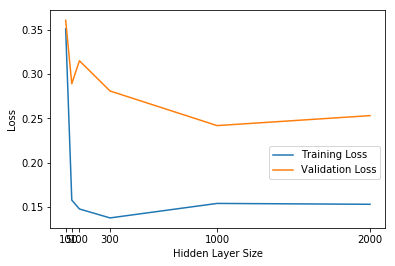

In [52]:
plt.plot(df2['Hidden Layer Size'], df2['Training Loss'])
plt.plot(df2['Hidden Layer Size'], df2['Validation Loss'])
plt.xticks(df2['Hidden Layer Size'])
plt.legend(['Training Loss', 'Validation Loss'], loc='center right', bbox_to_anchor=(1.0, 0.3), ncol=1)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Loss')

When M = 1000, the neural network has best validation accuracy 95.86% and lowest validation loss. The model overfits at M = 2000, because the validation loss increases and training loss decreases approaching this point.

## Tuning weight decay

In [14]:
weight_decay = [0, 0.0001, 0.001, 0.01, 0.1, 0.3]
lst_val_acc3 = []
lst_val_loss3 = []
lst_train_loss3 = []
for wd in weight_decay:
    net = get_model()
    optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay = wd)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, num_epochs=20, model=net, optimizer=optimizer)
    lst_val_acc3.append(val_acc)
    lst_val_loss3.append(val_loss)
    lst_train_loss3.append(train_loss) 

Epoch [1/20], Loss: 0.5545
Epoch [1/20], Loss: 0.4192
Epoch [1/20], Loss: 0.3539
Epoch [1/20], Loss: 0.3144
Epoch [1/20], Loss: 0.2890
Epoch [1/20], Loss: 0.2678
Epoch [1/20], Loss: 0.2507
Epoch [1/20], Loss: 0.2360
Epoch [1/20], Loss: 0.2241
Epoch [1/20], Loss: 0.2203
Epoch [1/20], Valid Accuracy: 95.8900, Valid Loss: 0.1293
Epoch [2/20], Loss: 0.0955
Epoch [2/20], Loss: 0.0954
Epoch [2/20], Loss: 0.0999
Epoch [2/20], Loss: 0.0962
Epoch [2/20], Loss: 0.0957
Epoch [2/20], Loss: 0.0942
Epoch [2/20], Loss: 0.0936
Epoch [2/20], Loss: 0.0932
Epoch [2/20], Loss: 0.0927
Epoch [2/20], Loss: 0.0924
Epoch [2/20], Valid Accuracy: 97.7100, Valid Loss: 0.0784
Epoch [3/20], Loss: 0.0474
Epoch [3/20], Loss: 0.0542
Epoch [3/20], Loss: 0.0563
Epoch [3/20], Loss: 0.0579
Epoch [3/20], Loss: 0.0585
Epoch [3/20], Loss: 0.0590
Epoch [3/20], Loss: 0.0586
Epoch [3/20], Loss: 0.0599
Epoch [3/20], Loss: 0.0608
Epoch [3/20], Loss: 0.0607
Epoch [3/20], Valid Accuracy: 97.7800, Valid Loss: 0.0726
Epoch [4/20], Lo

Epoch [5/20], Loss: 0.0410
Epoch [5/20], Loss: 0.0413
Epoch [5/20], Valid Accuracy: 97.7100, Valid Loss: 0.0771
Epoch [6/20], Loss: 0.0251
Epoch [6/20], Loss: 0.0296
Epoch [6/20], Loss: 0.0310
Epoch [6/20], Loss: 0.0310
Epoch [6/20], Loss: 0.0300
Epoch [6/20], Loss: 0.0310
Epoch [6/20], Loss: 0.0322
Epoch [6/20], Loss: 0.0333
Epoch [6/20], Loss: 0.0341
Epoch [6/20], Loss: 0.0342
Epoch [6/20], Valid Accuracy: 97.8200, Valid Loss: 0.0718
Epoch [7/20], Loss: 0.0251
Epoch [7/20], Loss: 0.0235
Epoch [7/20], Loss: 0.0263
Epoch [7/20], Loss: 0.0265
Epoch [7/20], Loss: 0.0270
Epoch [7/20], Loss: 0.0276
Epoch [7/20], Loss: 0.0277
Epoch [7/20], Loss: 0.0292
Epoch [7/20], Loss: 0.0308
Epoch [7/20], Loss: 0.0309
Epoch [7/20], Valid Accuracy: 97.9800, Valid Loss: 0.0709
Epoch [8/20], Loss: 0.0235
Epoch [8/20], Loss: 0.0252
Epoch [8/20], Loss: 0.0239
Epoch [8/20], Loss: 0.0263
Epoch [8/20], Loss: 0.0255
Epoch [8/20], Loss: 0.0260
Epoch [8/20], Loss: 0.0264
Epoch [8/20], Loss: 0.0271
Epoch [8/20], Lo

Epoch [10/20], Loss: 0.0517
Epoch [10/20], Loss: 0.0539
Epoch [10/20], Loss: 0.0554
Epoch [10/20], Loss: 0.0563
Epoch [10/20], Loss: 0.0582
Epoch [10/20], Loss: 0.0585
Epoch [10/20], Valid Accuracy: 97.6500, Valid Loss: 0.0797
Epoch [11/20], Loss: 0.0462
Epoch [11/20], Loss: 0.0507
Epoch [11/20], Loss: 0.0527
Epoch [11/20], Loss: 0.0545
Epoch [11/20], Loss: 0.0541
Epoch [11/20], Loss: 0.0549
Epoch [11/20], Loss: 0.0552
Epoch [11/20], Loss: 0.0559
Epoch [11/20], Loss: 0.0566
Epoch [11/20], Loss: 0.0572
Epoch [11/20], Valid Accuracy: 97.7100, Valid Loss: 0.0759
Epoch [12/20], Loss: 0.0448
Epoch [12/20], Loss: 0.0466
Epoch [12/20], Loss: 0.0486
Epoch [12/20], Loss: 0.0496
Epoch [12/20], Loss: 0.0518
Epoch [12/20], Loss: 0.0533
Epoch [12/20], Loss: 0.0556
Epoch [12/20], Loss: 0.0565
Epoch [12/20], Loss: 0.0571
Epoch [12/20], Loss: 0.0572
Epoch [12/20], Valid Accuracy: 97.8200, Valid Loss: 0.0686
Epoch [13/20], Loss: 0.0487
Epoch [13/20], Loss: 0.0484
Epoch [13/20], Loss: 0.0501
Epoch [13/2

Epoch [14/20], Valid Accuracy: 96.3400, Valid Loss: 0.1409
Epoch [15/20], Loss: 0.1612
Epoch [15/20], Loss: 0.1583
Epoch [15/20], Loss: 0.1539
Epoch [15/20], Loss: 0.1547
Epoch [15/20], Loss: 0.1557
Epoch [15/20], Loss: 0.1551
Epoch [15/20], Loss: 0.1565
Epoch [15/20], Loss: 0.1567
Epoch [15/20], Loss: 0.1576
Epoch [15/20], Loss: 0.1573
Epoch [15/20], Valid Accuracy: 96.0800, Valid Loss: 0.1508
Epoch [16/20], Loss: 0.1456
Epoch [16/20], Loss: 0.1471
Epoch [16/20], Loss: 0.1505
Epoch [16/20], Loss: 0.1520
Epoch [16/20], Loss: 0.1534
Epoch [16/20], Loss: 0.1549
Epoch [16/20], Loss: 0.1563
Epoch [16/20], Loss: 0.1569
Epoch [16/20], Loss: 0.1576
Epoch [16/20], Loss: 0.1578
Epoch [16/20], Valid Accuracy: 96.1200, Valid Loss: 0.1424
Epoch [17/20], Loss: 0.1530
Epoch [17/20], Loss: 0.1537
Epoch [17/20], Loss: 0.1560
Epoch [17/20], Loss: 0.1550
Epoch [17/20], Loss: 0.1557
Epoch [17/20], Loss: 0.1551
Epoch [17/20], Loss: 0.1546
Epoch [17/20], Loss: 0.1545
Epoch [17/20], Loss: 0.1561
Epoch [17/2

Epoch [19/20], Loss: 0.4551
Epoch [19/20], Loss: 0.4571
Epoch [19/20], Loss: 0.4590
Epoch [19/20], Loss: 0.4596
Epoch [19/20], Loss: 0.4613
Epoch [19/20], Loss: 0.4608
Epoch [19/20], Valid Accuracy: 89.9600, Valid Loss: 0.4368
Epoch [20/20], Loss: 0.4712
Epoch [20/20], Loss: 0.4728
Epoch [20/20], Loss: 0.4654
Epoch [20/20], Loss: 0.4638
Epoch [20/20], Loss: 0.4645
Epoch [20/20], Loss: 0.4629
Epoch [20/20], Loss: 0.4637
Epoch [20/20], Loss: 0.4634
Epoch [20/20], Loss: 0.4619
Epoch [20/20], Loss: 0.4610
Epoch [20/20], Valid Accuracy: 89.3100, Valid Loss: 0.4520
Epoch [1/20], Loss: 1.0034
Epoch [1/20], Loss: 0.9186
Epoch [1/20], Loss: 0.9023
Epoch [1/20], Loss: 0.8898
Epoch [1/20], Loss: 0.8820
Epoch [1/20], Loss: 0.8767
Epoch [1/20], Loss: 0.8712
Epoch [1/20], Loss: 0.8677
Epoch [1/20], Loss: 0.8648
Epoch [1/20], Loss: 0.8634
Epoch [1/20], Valid Accuracy: 80.6500, Valid Loss: 0.8440
Epoch [2/20], Loss: 0.8545
Epoch [2/20], Loss: 0.8492
Epoch [2/20], Loss: 0.8456
Epoch [2/20], Loss: 0.840

In [15]:
df3 = pd.DataFrame(
    {
        'Weight decay': weight_decay,
        'Validation Accuracy': lst_val_acc3,
        'Validation Loss': lst_val_loss3,
        'Training Loss': lst_train_loss3
    },
    columns = ['Weight decay', 'Validation Accuracy', 'Validation Loss', 'Training Loss']
)
df3

,Weight decay,Validation Accuracy,Validation Loss,Training Loss
0,0.0000,98.08,0.109553,0.010023
1,0.0001,97.92,0.080104,0.016318
2,0.0010,97.80,0.068751,0.051359
3,0.0100,96.19,0.146237,0.155705
4,0.1000,89.31,0.452039,0.461021
5,0.3000,85.68,0.800991,0.811295


## Tuning dropout

In [16]:
def get_model_v2(M = 300, p=0):
    modules = []
    modules.append(nn.Linear(28*28, M))
    modules.append(nn.ReLU())
    if p > 0:
        modules.append(nn.Dropout(p))
    modules.append(nn.Linear(M, 10))
    return nn.Sequential(*modules).cuda()

In [17]:
dropout = [0, 0.2, 0.4, 0.6, 0.8, 1]
lst_val_acc4 = []
lst_val_loss4 = []
lst_train_loss4 = []
for do in dropout:
    net = get_model_v2(p=do)
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, num_epochs=20, model=net, optimizer=optimizer)
    lst_val_acc4.append(val_acc)
    lst_val_loss4.append(val_loss)
    lst_train_loss4.append(train_loss) 

Epoch [1/20], Loss: 0.5544
Epoch [1/20], Loss: 0.4237
Epoch [1/20], Loss: 0.3618
Epoch [1/20], Loss: 0.3256
Epoch [1/20], Loss: 0.2933
Epoch [1/20], Loss: 0.2711
Epoch [1/20], Loss: 0.2536
Epoch [1/20], Loss: 0.2391
Epoch [1/20], Loss: 0.2274
Epoch [1/20], Loss: 0.2228
Epoch [1/20], Valid Accuracy: 96.6000, Valid Loss: 0.1095
Epoch [2/20], Loss: 0.0935
Epoch [2/20], Loss: 0.1017
Epoch [2/20], Loss: 0.0995
Epoch [2/20], Loss: 0.0990
Epoch [2/20], Loss: 0.0967
Epoch [2/20], Loss: 0.0975
Epoch [2/20], Loss: 0.0957
Epoch [2/20], Loss: 0.0948
Epoch [2/20], Loss: 0.0928
Epoch [2/20], Loss: 0.0932
Epoch [2/20], Valid Accuracy: 97.1900, Valid Loss: 0.0881
Epoch [3/20], Loss: 0.0580
Epoch [3/20], Loss: 0.0610
Epoch [3/20], Loss: 0.0644
Epoch [3/20], Loss: 0.0641
Epoch [3/20], Loss: 0.0628
Epoch [3/20], Loss: 0.0623
Epoch [3/20], Loss: 0.0638
Epoch [3/20], Loss: 0.0646
Epoch [3/20], Loss: 0.0637
Epoch [3/20], Loss: 0.0638
Epoch [3/20], Valid Accuracy: 97.3700, Valid Loss: 0.0811
Epoch [4/20], Lo

Epoch [5/20], Loss: 0.0579
Epoch [5/20], Loss: 0.0576
Epoch [5/20], Valid Accuracy: 98.0200, Valid Loss: 0.0714
Epoch [6/20], Loss: 0.0453
Epoch [6/20], Loss: 0.0453
Epoch [6/20], Loss: 0.0463
Epoch [6/20], Loss: 0.0483
Epoch [6/20], Loss: 0.0506
Epoch [6/20], Loss: 0.0505
Epoch [6/20], Loss: 0.0497
Epoch [6/20], Loss: 0.0506
Epoch [6/20], Loss: 0.0517
Epoch [6/20], Loss: 0.0514
Epoch [6/20], Valid Accuracy: 98.1600, Valid Loss: 0.0667
Epoch [7/20], Loss: 0.0389
Epoch [7/20], Loss: 0.0390
Epoch [7/20], Loss: 0.0405
Epoch [7/20], Loss: 0.0410
Epoch [7/20], Loss: 0.0448
Epoch [7/20], Loss: 0.0435
Epoch [7/20], Loss: 0.0438
Epoch [7/20], Loss: 0.0439
Epoch [7/20], Loss: 0.0436
Epoch [7/20], Loss: 0.0443
Epoch [7/20], Valid Accuracy: 98.1300, Valid Loss: 0.0671
Epoch [8/20], Loss: 0.0365
Epoch [8/20], Loss: 0.0387
Epoch [8/20], Loss: 0.0392
Epoch [8/20], Loss: 0.0384
Epoch [8/20], Loss: 0.0386
Epoch [8/20], Loss: 0.0388
Epoch [8/20], Loss: 0.0398
Epoch [8/20], Loss: 0.0397
Epoch [8/20], Lo

Epoch [10/20], Loss: 0.0590
Epoch [10/20], Loss: 0.0606
Epoch [10/20], Loss: 0.0612
Epoch [10/20], Loss: 0.0614
Epoch [10/20], Loss: 0.0621
Epoch [10/20], Loss: 0.0616
Epoch [10/20], Valid Accuracy: 97.9400, Valid Loss: 0.0714
Epoch [11/20], Loss: 0.0481
Epoch [11/20], Loss: 0.0511
Epoch [11/20], Loss: 0.0526
Epoch [11/20], Loss: 0.0523
Epoch [11/20], Loss: 0.0532
Epoch [11/20], Loss: 0.0557
Epoch [11/20], Loss: 0.0569
Epoch [11/20], Loss: 0.0583
Epoch [11/20], Loss: 0.0587
Epoch [11/20], Loss: 0.0596
Epoch [11/20], Valid Accuracy: 98.0600, Valid Loss: 0.0726
Epoch [12/20], Loss: 0.0494
Epoch [12/20], Loss: 0.0518
Epoch [12/20], Loss: 0.0510
Epoch [12/20], Loss: 0.0510
Epoch [12/20], Loss: 0.0524
Epoch [12/20], Loss: 0.0526
Epoch [12/20], Loss: 0.0528
Epoch [12/20], Loss: 0.0535
Epoch [12/20], Loss: 0.0536
Epoch [12/20], Loss: 0.0541
Epoch [12/20], Valid Accuracy: 98.3400, Valid Loss: 0.0644
Epoch [13/20], Loss: 0.0526
Epoch [13/20], Loss: 0.0479
Epoch [13/20], Loss: 0.0479
Epoch [13/2

Epoch [14/20], Valid Accuracy: 97.9800, Valid Loss: 0.0732
Epoch [15/20], Loss: 0.1030
Epoch [15/20], Loss: 0.0988
Epoch [15/20], Loss: 0.0987
Epoch [15/20], Loss: 0.1003
Epoch [15/20], Loss: 0.1001
Epoch [15/20], Loss: 0.1020
Epoch [15/20], Loss: 0.1037
Epoch [15/20], Loss: 0.1015
Epoch [15/20], Loss: 0.1027
Epoch [15/20], Loss: 0.1024
Epoch [15/20], Valid Accuracy: 98.0400, Valid Loss: 0.0744
Epoch [16/20], Loss: 0.0922
Epoch [16/20], Loss: 0.0937
Epoch [16/20], Loss: 0.0981
Epoch [16/20], Loss: 0.0936
Epoch [16/20], Loss: 0.0947
Epoch [16/20], Loss: 0.0958
Epoch [16/20], Loss: 0.0967
Epoch [16/20], Loss: 0.0969
Epoch [16/20], Loss: 0.0976
Epoch [16/20], Loss: 0.0973
Epoch [16/20], Valid Accuracy: 98.1200, Valid Loss: 0.0809
Epoch [17/20], Loss: 0.0927
Epoch [17/20], Loss: 0.0846
Epoch [17/20], Loss: 0.0846
Epoch [17/20], Loss: 0.0883
Epoch [17/20], Loss: 0.0933
Epoch [17/20], Loss: 0.0936
Epoch [17/20], Loss: 0.0946
Epoch [17/20], Loss: 0.0954
Epoch [17/20], Loss: 0.0960
Epoch [17/2

Epoch [19/20], Loss: 0.2312
Epoch [19/20], Loss: 0.2298
Epoch [19/20], Loss: 0.2293
Epoch [19/20], Loss: 0.2310
Epoch [19/20], Loss: 0.2319
Epoch [19/20], Loss: 0.2322
Epoch [19/20], Valid Accuracy: 97.1900, Valid Loss: 0.1058
Epoch [20/20], Loss: 0.2522
Epoch [20/20], Loss: 0.2333
Epoch [20/20], Loss: 0.2243
Epoch [20/20], Loss: 0.2283
Epoch [20/20], Loss: 0.2342
Epoch [20/20], Loss: 0.2329
Epoch [20/20], Loss: 0.2324
Epoch [20/20], Loss: 0.2312
Epoch [20/20], Loss: 0.2317
Epoch [20/20], Loss: 0.2321
Epoch [20/20], Valid Accuracy: 97.1400, Valid Loss: 0.1102
Epoch [1/20], Loss: 2.3037
Epoch [1/20], Loss: 2.3033
Epoch [1/20], Loss: 2.3029
Epoch [1/20], Loss: 2.3026
Epoch [1/20], Loss: 2.3025
Epoch [1/20], Loss: 2.3023
Epoch [1/20], Loss: 2.3022
Epoch [1/20], Loss: 2.3022
Epoch [1/20], Loss: 2.3020
Epoch [1/20], Loss: 2.3019
Epoch [1/20], Valid Accuracy: 8.6000, Valid Loss: 2.3674
Epoch [2/20], Loss: 2.3015
Epoch [2/20], Loss: 2.3014
Epoch [2/20], Loss: 2.3013
Epoch [2/20], Loss: 2.3015

In [18]:
df4 = pd.DataFrame(
    {
        'Dropout': dropout,
        'Validation Accuracy': lst_val_acc4,
        'Validation Loss': lst_val_loss4,
        'Training Loss': lst_train_loss4
    },
    columns = ['Dropout', 'Validation Accuracy', 'Validation Loss', 'Training Loss']
)
df4

,Dropout,Validation Accuracy,Validation Loss,Training Loss
0,0.0,97.83,0.140661,0.011825
1,0.2,98.34,0.082525,0.023764
2,0.4,98.39,0.077166,0.042500
3,0.6,98.10,0.076677,0.088586
4,0.8,97.14,0.110204,0.232067
5,1.0,8.55,2.367744,2.301278


Text(0,0.5,'Loss')

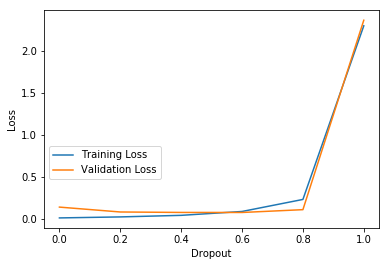

In [56]:
plt.plot(df4['Dropout'], df4['Training Loss'])
plt.plot(df4['Dropout'], df4['Validation Loss'])
plt.xticks(df4['Dropout'])
plt.legend(['Training Loss', 'Validation Loss'], loc='center left', bbox_to_anchor=(0.0, 0.3), ncol=1)
plt.xlabel('Dropout')
plt.ylabel('Loss')

When dropout rate = 0.4, the neural network has the best validation accuracy. As dropout rate increases to 1, validation accuracy plummets after 0.8, meaning too many hidden units are dropped. 
Comparing to the model with no dropout, models with moderate dropout has a lower validation loss and a higher validation accuracy.
Comparing to models with L2 regularization, dropout seems to have a better performance in this case.

## 3-layer nn

In [65]:
def get_model_v3(M = 300):
    net = nn.Sequential(nn.Linear(28*28, M),
                        nn.ReLU(),
                        nn.Linear(M, M),
                        nn.ReLU(),
                        nn.Linear(M, 10))
    return net.cuda() 

In [67]:
def train_model_v2(train_loader, test_loader, num_epochs, model, optimizer):
    for epoch in range(num_epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for i, (images, labels) in enumerate(train_loader):  
            batch = images.shape[0] # size of the batch
            # Convert torch tensor to Variable, change shape of the input
            images = Variable(images.view(-1, 28*28)).cuda()
            labels = Variable(labels).cuda()
        
            # Forward + Backward + Optimize
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
        
            total += batch
            sum_loss += batch * loss.data[0]        
        train_loss = sum_loss/total
        val_acc, val_loss = model_accuracy_loss(model, test_loader)
    return val_acc, val_loss, train_loss

In [68]:
learning_rate_nn3 = [0.0006, 0.0008, 0.001]
hidden_layer_size_nn3 = [500,1000,1200]
weight_decay_nn3 = [0, 0.0001, 0.0005]
for l_r in learning_rate_nn3:
    for hls in hidden_layer_size_nn3:
        for wd in weight_decay_nn3:
            net = get_model_v3(M=hls)
            optimizer = optim.Adam(net.parameters(), lr=l_r, weight_decay=wd)
            val_acc, val_loss, train_loss = train_model_v2(train_loader, test_loader, num_epochs=10, model=net, optimizer=optimizer)
            print("Learning rate:{0} | M:{1} | Weight decay:{2} : Validation Accuracy:{3} | Validation Loss:{4} | Training Loss:{5}"\
                  .format(l_r, hls, wd, val_acc, val_loss, train_loss)) 

Learning rate:0.0006 | M:500 | Weight decay:0 : Validation Accuracy:97.92 | Validation Loss:0.08773291255235673 | Training Loss:0.015300973655780157
Learning rate:0.0006 | M:500 | Weight decay:0.0001 : Validation Accuracy:98.1 | Validation Loss:0.06707664527893066 | Training Loss:0.020199961175521215
Learning rate:0.0006 | M:500 | Weight decay:0.0005 : Validation Accuracy:98.11 | Validation Loss:0.06005364141464233 | Training Loss:0.0336373145977656
Learning rate:0.0006 | M:1000 | Weight decay:0 : Validation Accuracy:97.61 | Validation Loss:0.11141345298290253 | Training Loss:0.019644404022892317
Learning rate:0.0006 | M:1000 | Weight decay:0.0001 : Validation Accuracy:97.74 | Validation Loss:0.08274085282087326 | Training Loss:0.02024154270788034
Learning rate:0.0006 | M:1000 | Weight decay:0.0005 : Validation Accuracy:98.08 | Validation Loss:0.06289263942241669 | Training Loss:0.035140036938587825
Learning rate:0.0006 | M:1200 | Weight decay:0 : Validation Accuracy:98.01 | Validation

### Best hyperparameters
Learning rate:0.0008  M:1200  Weight decay:0 : Validation Accuracy:98.35